In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

In [3]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
hits = pd.read_csv("billboard_info.csv")

audio = pd.read_csv("billboard_audio.csv")

In [3]:
#look at first few rows of 'hits' df
hits.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [5]:
#look at first few rows of 'audio' df
audio.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,�D�nde Est� Santa Claus? (Where Is Santa Claus...,Augie Rios,�D�nde Est� Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [4]:
#merge the two datasets

billboard = pd.merge(hits, audio, how="inner", left_on="SongID", right_on="SongID")
billboard.head()

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,...,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,...,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,...,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,...,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,...,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0


In [8]:
#look at the columns in the dataframe
billboard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330278 entries, 0 to 330277
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   url                        330278 non-null  object 
 1   WeekID                     330278 non-null  object 
 2   Week Position              330278 non-null  int64  
 3   Song_x                     330278 non-null  object 
 4   Performer_x                330278 non-null  object 
 5   SongID                     330278 non-null  object 
 6   Instance                   330278 non-null  int64  
 7   Previous Week Position     298115 non-null  float64
 8   Peak Position              330278 non-null  int64  
 9   Weeks on Chart             330278 non-null  int64  
 10  Performer_y                330278 non-null  object 
 11  Song_y                     330278 non-null  object 
 12  spotify_genre              315770 non-null  object 
 13  spotify_track_id           28

In [5]:
#create a dataframe that only contains each song's highest charting position
highest_rank = billboard.groupby("SongID")["Peak Position"].idxmin()
highest_rank_list = highest_rank.tolist()
billboard2 = billboard.loc[billboard.index[highest_rank_list]].sort_index()
billboard2 = billboard2.reset_index()
billboard2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29370 non-null  int64  
 1   url                        29370 non-null  object 
 2   WeekID                     29370 non-null  object 
 3   Week Position              29370 non-null  int64  
 4   Song_x                     29370 non-null  object 
 5   Performer_x                29370 non-null  object 
 6   SongID                     29370 non-null  object 
 7   Instance                   29370 non-null  int64  
 8   Previous Week Position     24306 non-null  float64
 9   Peak Position              29370 non-null  int64  
 10  Weeks on Chart             29370 non-null  int64  
 11  Performer_y                29370 non-null  object 
 12  Song_y                     29370 non-null  object 
 13  spotify_genre              27775 non-null  obj

In [6]:
#sort values by peak chart position
billboard2.sort_values(by="Peak Position")

,index,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
4979,69480,http://www.billboard.com/charts/hot-100/1992-0...,6/20/1992,1,I'll Be There,Mariah Carey,I'll Be ThereMariah Carey,1,2.0,1,...,-9.427,1.0,0.0315,0.716000,0.000000,0.8710,0.279,82.025,4.0,52.0
12345,153042,http://www.billboard.com/charts/hot-100/1975-0...,2/15/1975,6,Fire,Ohio Players,FireOhio Players,1,1.0,1,...,-15.733,1.0,0.0604,0.101000,0.015800,0.2690,0.843,107.319,4.0,55.0
2470,35463,https://www.billboard.com/charts/hot-100/2020-...,12/5/2020,1,Life Goes On,BTS,Life Goes OnBTS,1,NaN,1,...,-5.733,1.0,0.0424,0.006910,0.000000,0.3700,0.450,81.068,4.0,87.0
12340,152966,http://www.billboard.com/charts/hot-100/1973-0...,6/2/1973,1,My Love,Paul McCartney And Wings,My LovePaul McCartney And Wings,1,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12337,152931,http://www.billboard.com/charts/hot-100/1971-0...,8/14/1971,1,How Can You Mend A Broken Heart,Bee Gees,How Can You Mend A Broken HeartBee Gees,1,1.0,1,...,-13.715,1.0,0.0328,0.635000,0.000000,0.0885,0.251,68.541,4.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26127,293584,http://www.billboard.com/charts/hot-100/2009-0...,9/19/2009,100,Million Dollar Bill,Whitney Houston,Million Dollar BillWhitney Houston,1,NaN,100,...,-4.134,0.0,0.1110,0.054000,0.000000,0.0845,0.765,119.899,4.0,57.0
23596,269957,http://www.billboard.com/charts/hot-100/1962-0...,9/29/1962,100,Try A Little Tenderness,Aretha Franklin,Try A Little TendernessAretha Franklin,1,NaN,100,...,-13.805,1.0,0.0369,0.885000,0.000063,0.2740,0.252,73.703,3.0,28.0
26115,293408,http://www.billboard.com/charts/hot-100/2008-0...,1/12/2008,100,Leave It All To Me (iCarly Theme Song),Miranda Cosgrove Featuring Drake Bell,Leave It All To Me (iCarly Theme Song)Miranda ...,1,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26138,293693,http://www.billboard.com/charts/hot-100/2011-0...,2/5/2011,100,"For You, And Your Denial",Yellowcard,"For You, And Your DenialYellowcard",1,NaN,100,...,-3.530,1.0,0.0906,0.000303,0.000112,0.1800,0.477,175.098,4.0,43.0


In [7]:
#convert WeekID to date and create a column that contains the year for each song
billboard2["WeekID"] = pd.to_datetime(billboard2.WeekID)
billboard2['year'] = billboard2['WeekID'].dt.year

In [8]:
#create a decade column

billboard3 = billboard2.copy()




def add_decade(row):
    if row["year"] >= 1960 and row["year"] < 1970:
        return "1960s"
    elif row["year"] >= 1970 and row["year"] < 1980:
        return "1970s"
    elif row["year"] >= 1980 and row["year"] < 1990:
        return "1980s"
    elif row["year"] >= 1990 and row["year"] < 2000:
        return "1990s"
    elif row["year"] >= 2000 and row["year"] < 2010:
        return "2000s"
    elif row["year"] >= 2010 and row["year"] < 2020:
        return "2010s"
    elif row["year"] >= 2020:
        return "2020s"
    elif row["year"] < 1960:
        return "1950s"

    


billboard3.apply (lambda row: add_decade(row), axis=1)


billboard3['decade'] = billboard3.apply (lambda row: add_decade(row), axis=1)

In [9]:
#create a mid_decade column

def mid_decade(row):
    if  row["year"] < 1960:
        return "1950s"
    elif row["year"] >= 1960 and row["year"] < 1965:
        return "1960-1964"
    elif row["year"] >= 1965 and row["year"] < 1970:
        return "1965-1969"
    elif row["year"] >= 1970 and row["year"] < 1975:
        return "1970-1974"
    elif row["year"] >= 1975 and row["year"] < 1980:
        return "1975-1979"
    elif row["year"] >= 1980 and row["year"] < 1985:
        return "1980-1984"
    elif row["year"] >= 1985 and row["year"] < 1990:
        return "1985-1989"
    elif row["year"] >= 1990 and row["year"] < 1995:
        return "1990-1994"
    elif row["year"] >= 1995 and row["year"] < 2000:
        return "1995-1999"
    elif row["year"] >= 2000 and row["year"] < 2005:
        return "2000-2004"
    elif row["year"] >= 2005 and row["year"] < 2010:
        return "2005-2009"
    elif row["year"] >= 2010 and row["year"] < 2015:
        return "2010-2014"
    elif row["year"] >= 2015 and row["year"] < 2020:
        return "2015-2019"
    elif row["year"] >= 2020:
        return "2020s (late)"
    

    


billboard3.apply (lambda row: mid_decade(row), axis=1)


billboard3['mid_decade'] = billboard3.apply (lambda row: mid_decade(row), axis=1)

In [3]:
#create a mid_decade column

def mid_decade(row):
    if  row["year"] < 1960:
        return "1950s"
    elif row["year"] >= 1960 and row["year"] < 1965:
        return "1960-1964"
    elif row["year"] >= 1965 and row["year"] < 1970:
        return "1965-1969"
    elif row["year"] >= 1970 and row["year"] < 1975:
        return "1970-1974"
    elif row["year"] >= 1975 and row["year"] < 1980:
        return "1975-1979"
    elif row["year"] >= 1980 and row["year"] < 1985:
        return "1980-1984"
    elif row["year"] >= 1985 and row["year"] < 1990:
        return "1985-1989"
    elif row["year"] >= 1990 and row["year"] < 1995:
        return "1990-1994"
    elif row["year"] >= 1995 and row["year"] < 2000:
        return "1995-1999"
    elif row["year"] >= 2000 and row["year"] < 2005:
        return "2000-2004"
    elif row["year"] >= 2005 and row["year"] < 2010:
        return "2005-2009"
    elif row["year"] >= 2010 and row["year"] < 2015:
        return "2010-2014"
    elif row["year"] >= 2015 and row["year"] < 2020:
        return "2015-2019"
    elif row["year"] >= 2020:
        return "2020s"
    

    


top_40.apply (lambda row: mid_decade(row), axis=1)


top_40['mid_decade'] = top_40.apply (lambda row: mid_decade(row), axis=1)

In [10]:
#create a dataframe with only Top 40 hits

top_forty = billboard3[billboard3["Peak Position"] <= 40]

<AxesSubplot:title={'center':'Number of Top 40 Hits by Decade'}>

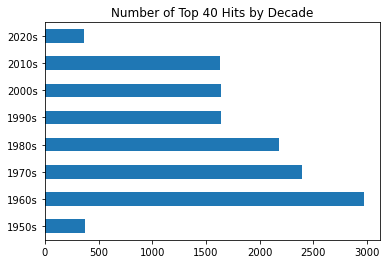

In [11]:
#number of top 40 hits per decade 
top_forty["decade"].value_counts().sort_index().plot(kind = "barh", title = "Number of Top 40 Hits by Decade")

In [12]:
#drop unnecessary columns
top_40 =  top_forty.drop(["url","WeekID", "Week Position", "Instance", "Previous Week Position",
                    "Weeks on Chart", "Performer_y", "Song_y", "spotify_track_id", "spotify_track_preview_url"], axis=1)

In [13]:
#drop rows that do not have the Spotify metrics
top_40 = top_40[top_40["danceability"].notna()]

In [14]:
#rename columns
top_40 = top_40.rename(columns={"Song_x" : "song", "Performer_x": "artist", "Peak Position":"peak_position",
                      "SongID" : "songid","spotify_genre": "genre", "spotify_track_duration_ms":"duration",
                      "spotify_track_explicit":"explicit", "spotify_track_album":"album", "peak_position": "peak"})

In [15]:
#convert duration to length in minutes
top_40["length_secs"] = top_40["duration"]/1000
top_40["length_mins"] = (top_40["length_secs"]/60).round(2)

In [16]:
top_40.rename(columns = {"length_mins" : "length"}, inplace = True)

In [17]:
#functions to find & plot the mean of each metric per decade and mid-decade
def decade_avg_plot(metric):
    df = top_40.groupby("decade")[[metric]].mean().reset_index()
    df2 = top_40.groupby("mid_decade")[[metric]].mean().reset_index()
    fig = make_subplots(rows = 1, cols = 2, subplot_titles = ["Decade", "Mid-Decade"])

    fig.add_trace(go.Bar(x = df["decade"], y = df[metric], text = df[metric] ), row = 1, col = 1)

    fig.add_trace(go.Bar(x = df2["mid_decade"], y = df2[metric], text = df2[metric] ), row = 1, col = 2)

    fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5,  hovertemplate = "<b>Years<b>:%{x}<br>"
                                                                              "<b>Average<b>: %{y:.3f}<br>"
                                                                              "<extra></extra>", texttemplate = '%{text:.3f}')

    fig.update_layout(title_text = "Song " + metric.title() + " Average", showlegend = False)
    fig.update_annotations(font_size=14)
    fig.show()

In [18]:
def most_least(metric):
    df = top_40.groupby("year")[metric].mean().round(3).sort_values(ascending=False)
    df = pd.concat([df.head(1), df.tail(1)]).to_frame().reset_index()
    rowOddColor = "white"
    rowEvenColor = "lightgrey"
    fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='lightskyblue',
                line_color='darkslategray',
                align='center'),
    cells=dict(values=[df["year"], df[metric]],
               line_color='darkslategray',
               fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*2],
               align='left'))])
    fig.update_layout(title_text = "Years With Highest and Lowest Average for " + metric.title())
    fig.show()

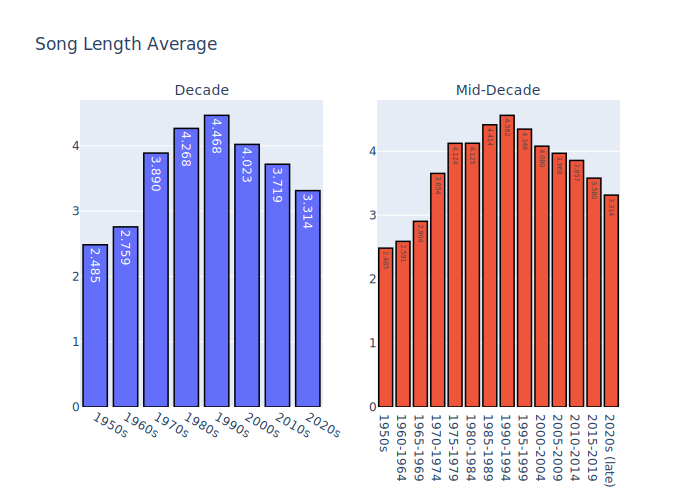

In [19]:
decade_avg_plot("length")

Song lengths increased until peaking in the 90s, specifially the early 90s. In the age of streaming, average hit song
lengths are now decreasing, perhaps in an effort to increase the number of streams.

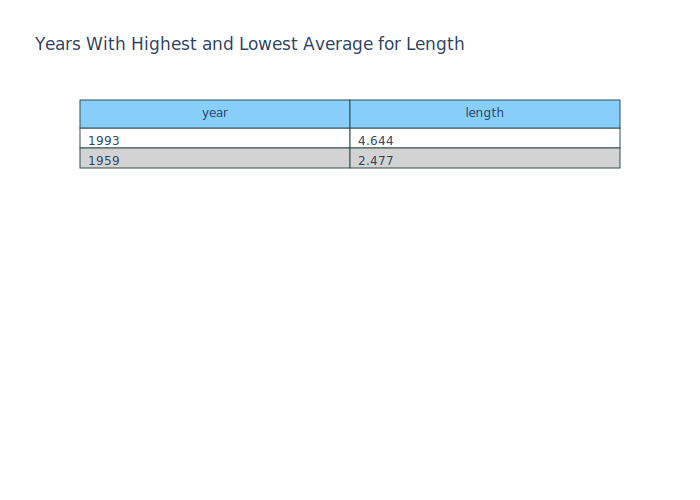

In [20]:
most_least("length")

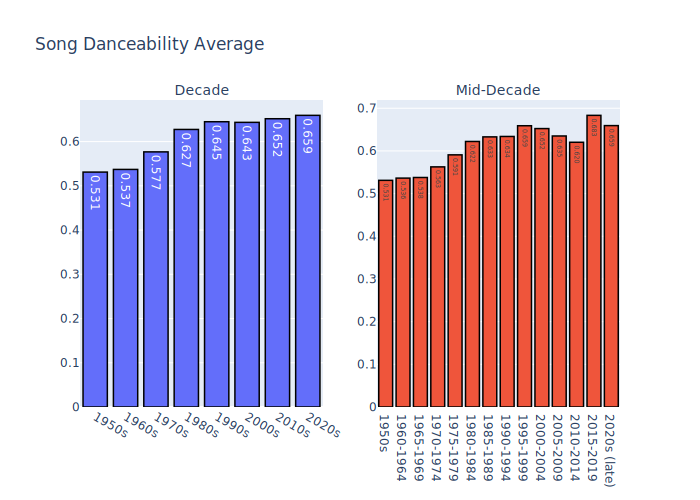

In [21]:
decade_avg_plot("danceability")

The average danceability of top 40 hits is at its highest in the early 2020s, but peaked specificially from 
2015-2019.

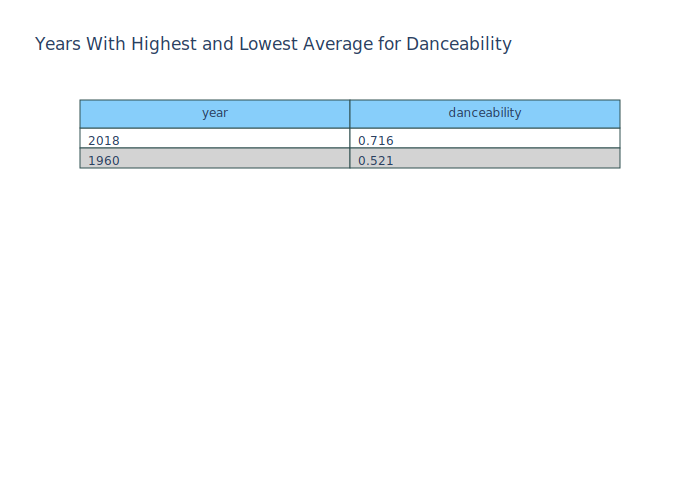

In [22]:
most_least("danceability")

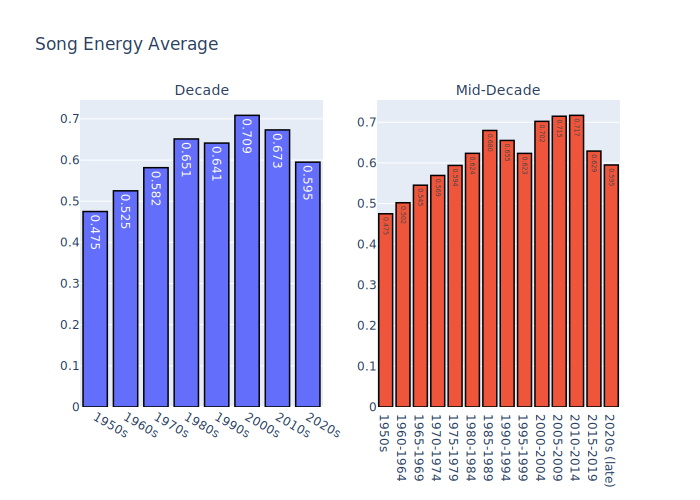

In [23]:
decade_avg_plot("energy")

Energy measures the 'intensity and activity' of a track on a scale of 0 to 1. High energy
tracks are fast, loud, and noisy; a death metal track would be an example of a high energy song,
while a calm, slow lullaby would be low energy.
Energy contined to rise from the late 1950s, with a slight dip in the 1990s, before peaking in the 2000s,
and specifically from 2005-2014.

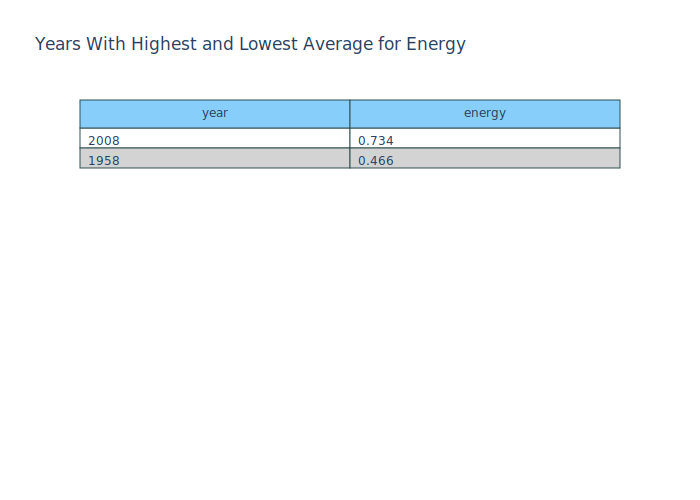

In [24]:
most_least("energy")

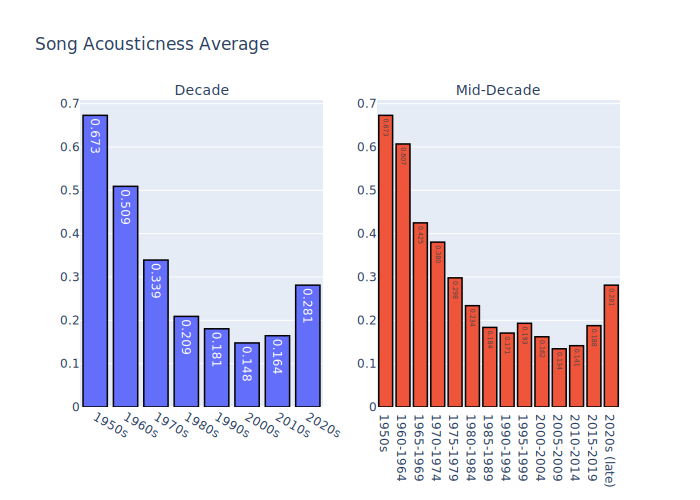

In [25]:
decade_avg_plot("acousticness")

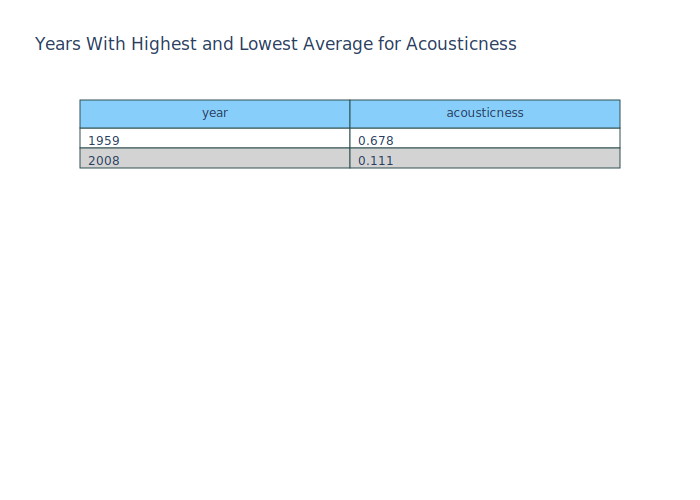

In [26]:
most_least("acousticness")

The acousticness of hits songs has decreased each decade, from the late 1950s to 2000s, before starting to rise
slightly in the 2010s and early 2020s

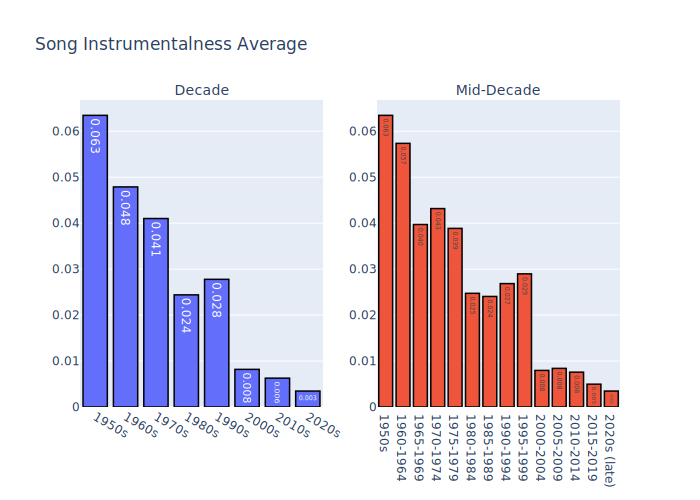

In [27]:
decade_avg_plot("instrumentalness")

Instrumentalness represents the amount of vocals in a song, on a scale from 0 to 1.
The closer 1 a song is, the more instrumental it is.

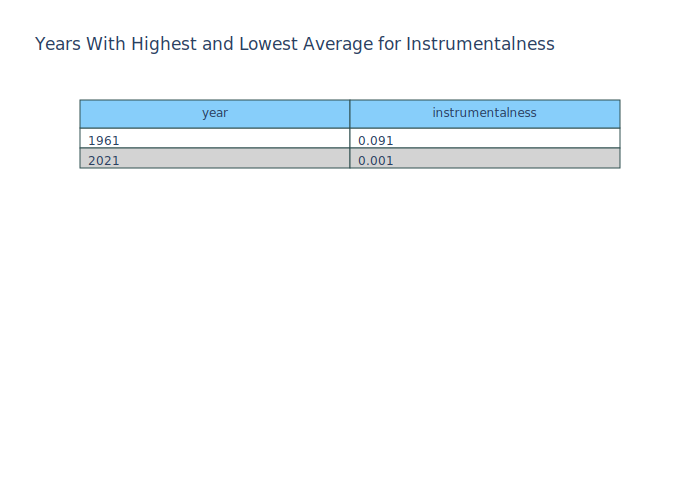

In [28]:
most_least("instrumentalness")

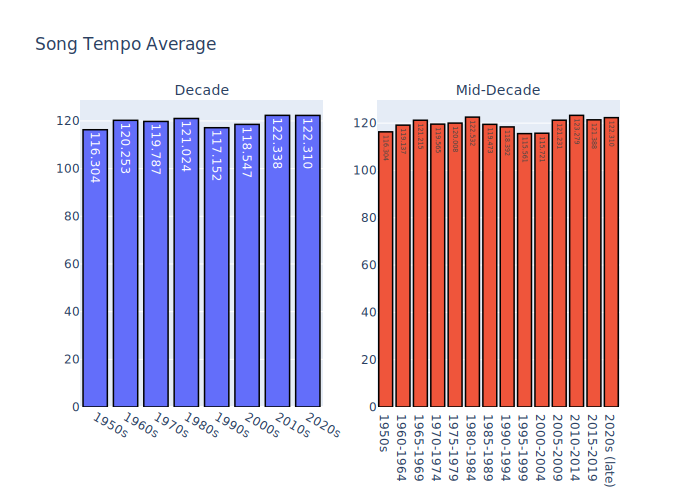

In [29]:
decade_avg_plot("tempo")

The average tempo has remained fairly constant throughout the decades, with the 90s having the 
lowest average. Top 40 hits had the lowest average tempo from 1995 to 2004.

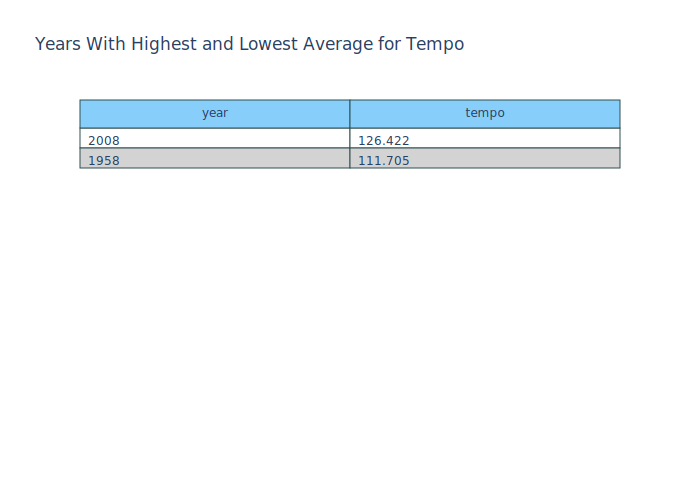

In [30]:
most_least("tempo")

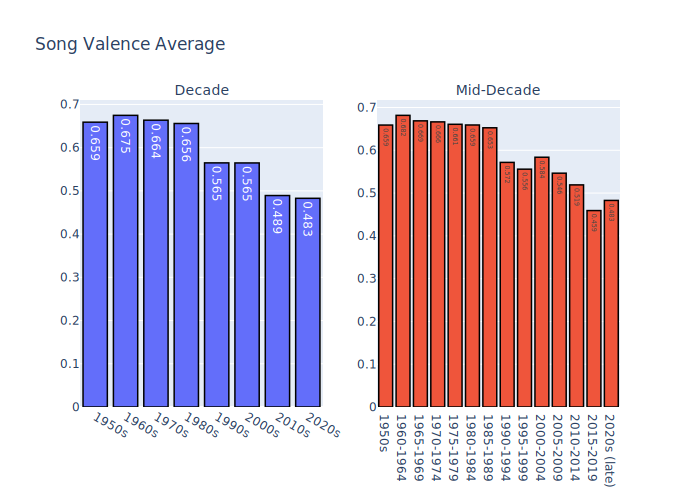

In [31]:
decade_avg_plot("valence")

Valance describes the 'musical positiveness' of a song, on a scale of 0 to 1.
Valance peaked in the 60s, and was at its highest from the late 50s until 1964. There was a fairly
sharp drop beginning in the nineties and the lowest average velance has been from 2015 to 2019.

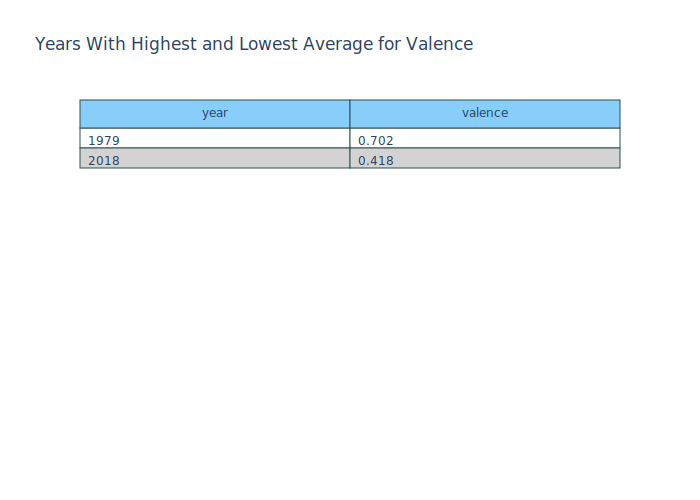

In [32]:
most_least("valence")

In [33]:
ranks_df = top_40.groupby("decade")["length"].mean().rank(ascending= False, method = "min").to_frame().reset_index()
columns = ["acousticness", "danceability", "energy", "instrumentalness", "loudness", "tempo", "valence"]
for column in columns:
    df = top_40.groupby("decade")[column].mean().rank(ascending = False, method = "min").to_frame().reset_index()
    ranks_df = pd.merge(ranks_df, df, how = "inner", on = "decade")


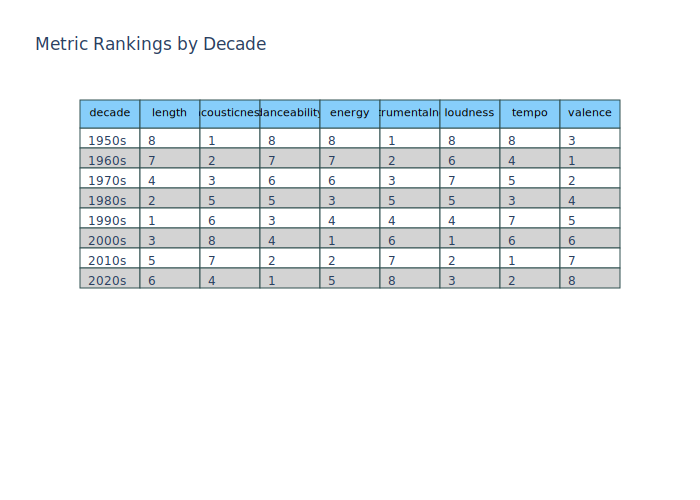

In [34]:
rowOddColor = "white"
rowEvenColor = "lightgrey"
fig = go.Figure(data=[go.Table(
        header=dict(values=list(ranks_df.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=11)),
        cells=dict(values=[ranks_df["decade"], ranks_df["length"], ranks_df["acousticness"], ranks_df["danceability"],
                   ranks_df["energy"], ranks_df["instrumentalness"], ranks_df["loudness"], ranks_df["tempo"], ranks_df["valence"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*4],
                   align='left'))])
fig.update_layout(title_text = "Metric Rankings by Decade")
fig.show()

In [107]:
explicit = top_40.groupby("decade")["explicit"].value_counts(normalize = True).to_frame()
explicit.rename(columns = {"explicit" : "percent"}, inplace = True)
explicit["percent"] = (explicit["percent"] * 100).round(2)
explicit = explicit.reset_index()
explicit

,decade,explicit,percent
0,1950s,False,100.00
1,1960s,False,99.96
2,1960s,True,0.04
3,1970s,False,99.95
4,1970s,True,0.05
5,1980s,False,99.70
6,1980s,True,0.30
7,1990s,False,91.47
8,1990s,True,8.53
9,2000s,False,77.91


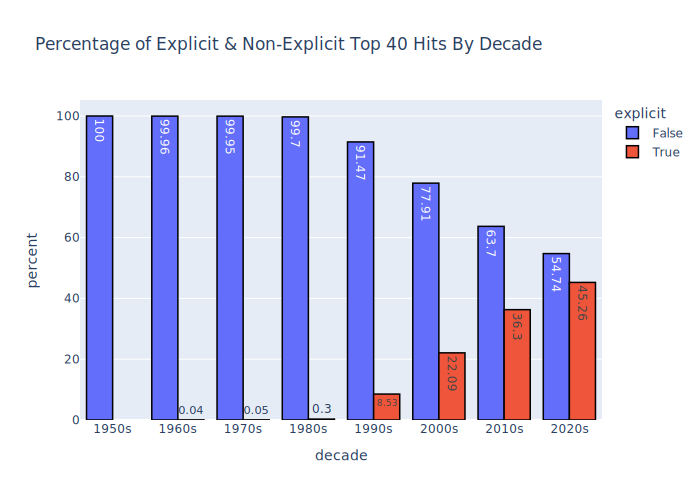

In [108]:
fig = px.bar(explicit, x = "decade", y = "percent", color = "explicit",
            title = "Percentage of Explicit & Non-Explicit Top 40 Hits By Decade", barmode = "group",
            text_auto = '3.f')
fig.update_traces(marker_line_color = "black", marker_line_width = 1.5)

fig.show()

In [43]:
#function to consolidate genre classifications
def genre_columns(data):
    
    new_columns = ['pop', 'electronic/dance', 'r&b', 'jazz', 'adult_contemporary',
                  'singer/songwriter', 'country', 'rock', 'alternative', 'latin', 'christian/gospel',
                  'holiday', 'hip-hop/rap', 'disco']

    data.loc[data['genre'].str.contains('pop', case=False, na=False), 'pop'] = 1
    data.loc[data['genre'].str.contains('electronic' or 'dance', case=False, na=False), 'electronic/dance'] = 1
    data.loc[data['genre'].str.contains('r&b' or 'rhythm & blues' or 'rhythm and blues' or 'soul' or 'urban contemporary' or 'quiet storm', case=False, na=False), 'r&b'] = 1
    data.loc[data['genre'].str.contains('jazz', case=False, na=False), 'jazz'] = 1
    data.loc[data['genre'].str.contains('adult contemporary', case=False, na=False), 'adult_contemporary'] = 1
    data.loc[data['genre'].str.contains('singer-songwriter' or 'singer songwriter', case=False, na=False), 'singer/songwriter'] = 1
    data.loc[data['genre'].str.contains('country', case=False, na=False), 'country'] = 1
    data.loc[data['genre'].str.contains('rock', case=False, na=False), 'rock'] = 1
    data.loc[data['genre'].str.contains('alternative', case=False, na=False), 'alternative'] = 1
    data.loc[data['genre'].str.contains('latin', case=False, na=False), 'latin'] = 1
    data.loc[data['genre'].str.contains('christian' or 'gospel', case=False, na=False), 'christian/gospel'] = 1
    data.loc[data['genre'].str.contains('holiday' or'christmas', case=False, na=False), 'holiday'] = 1
    data.loc[data['genre'].str.contains('hip hop' or 'rap', case=False, na=False), 'hip-hop/rap'] = 1
    data.loc[data['genre'].str.contains('disco', case=False, na=False), 'disco'] = 1
  
    data[new_columns] = data[new_columns].fillna(0)
    

    return data

In [49]:
genre_columns(top_40)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11579 entries, 0 to 29366
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     11579 non-null  int64  
 1   song                      11579 non-null  object 
 2   artist                    11579 non-null  object 
 3   songid                    11579 non-null  object 
 4   peak_position             11579 non-null  int64  
 5   genre                     11499 non-null  object 
 6   duration                  11577 non-null  float64
 7   explicit                  11577 non-null  object 
 8   album                     11573 non-null  object 
 9   danceability              11579 non-null  float64
 10  energy                    11579 non-null  float64
 11  key                       11579 non-null  float64
 12  loudness                  11579 non-null  float64
 13  mode                      11579 non-null  float64
 14  speech

In [50]:
def hits_prop(genre):
    df_prop = (top_40.groupby("decade")[genre].sum())/(top_40.groupby("decade")['song'].count())
    df_prop = pd.DataFrame(df_prop).reset_index().rename(columns = {0:"proportion"})
    fig = px.bar(df_prop, x = "decade", y = "proportion", title = "Proportion of Top 40 Hits Categorized as " + genre.title() + " by Decade")
    fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5,  hovertemplate = "<b>Decade<b>:%{x}<br>"
                                                                                          "<b>Proportion<b>: %{y:.3f}<br>"
                                                                                          "<extra></extra>", texttemplate = '%{y:.3f}')
    fig.show()

In [51]:
#year with highest percentage of pop hits
def prop_most(genre):
    prop_year = (top_40.groupby("year")[genre].sum())/(top_40.groupby("year")['song'].count())
    prop_year = pd.DataFrame(prop_year).reset_index().rename(columns = {0: "proportion"})
    prop_year = prop_year.sort_values(by = "proportion", ascending=False).head(1).round(3)
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(prop_year.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    align='center'),
        cells=dict(values=[prop_year["year"], prop_year["proportion"]],
                   line_color='darkslategray',
                   fill_color='white',
                   align='left'))])
    fig.update_layout(title_text = "Year With Highest Proportion of  " + genre.title() + " Hits")
    fig.show()

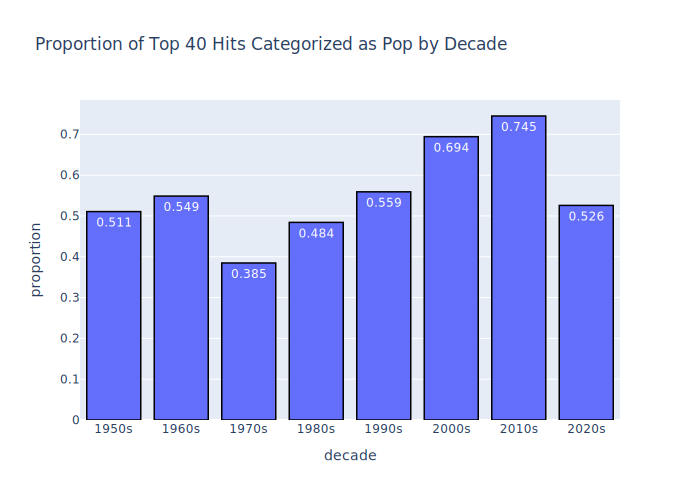

In [52]:
hits_prop("pop")

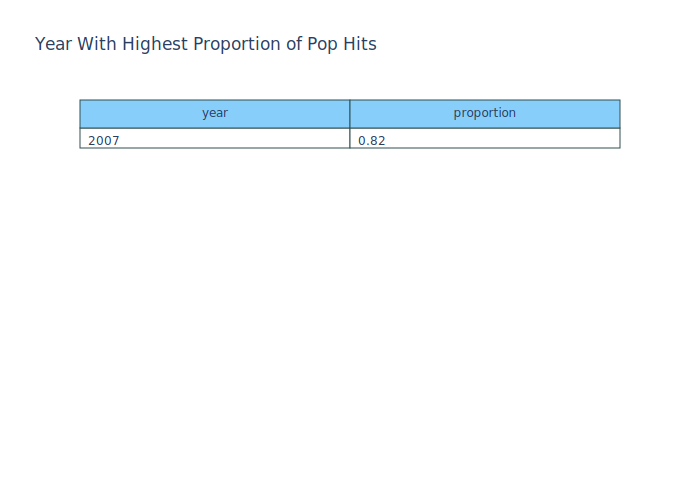

In [53]:
prop_most("pop")

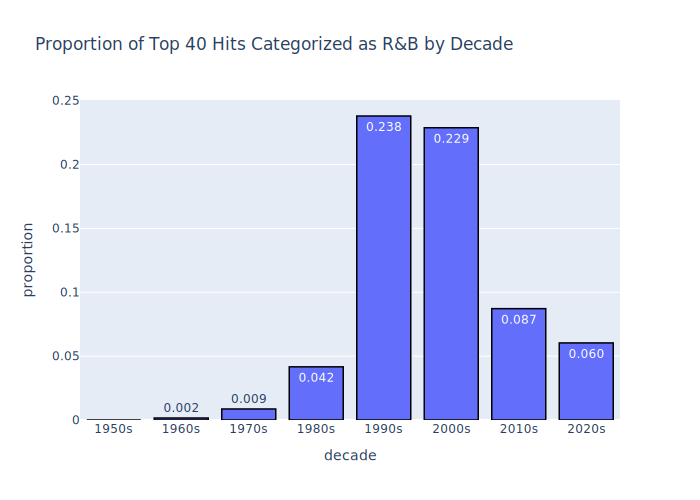

In [54]:
hits_prop("r&b")

#R&B as a genre classification did not truly grow until the 1980s,before peaking in the 90s and 00s

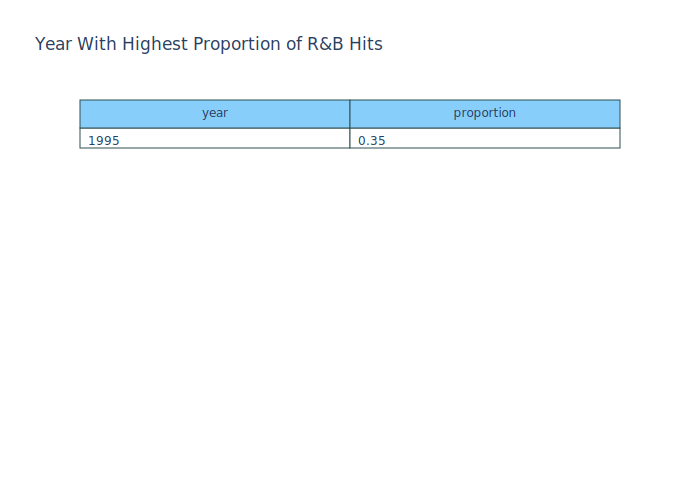

In [55]:
prop_most("r&b")

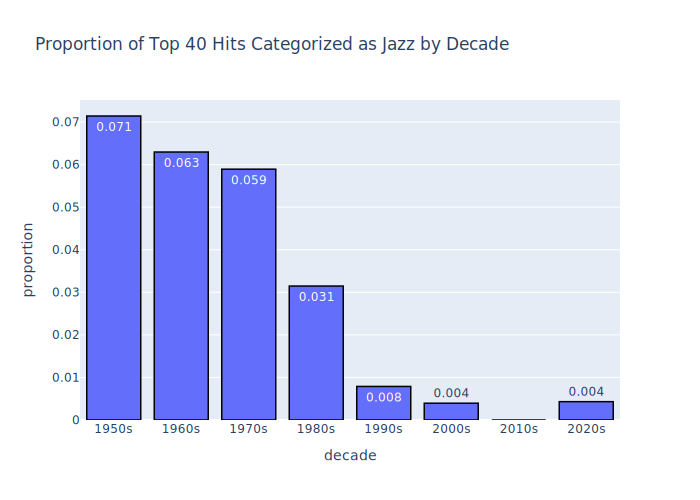

In [56]:
hits_prop("jazz")
#jazz peaked in the late 1950s, before almost completely disappearing from
#the Top 40 by the 1990s.

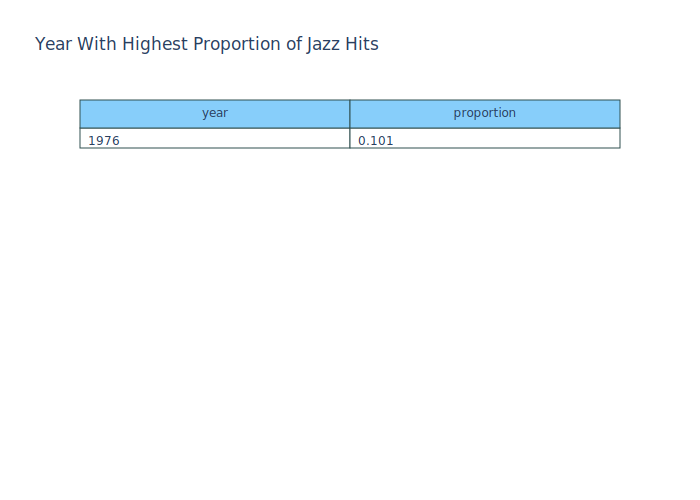

In [57]:
prop_most("jazz")

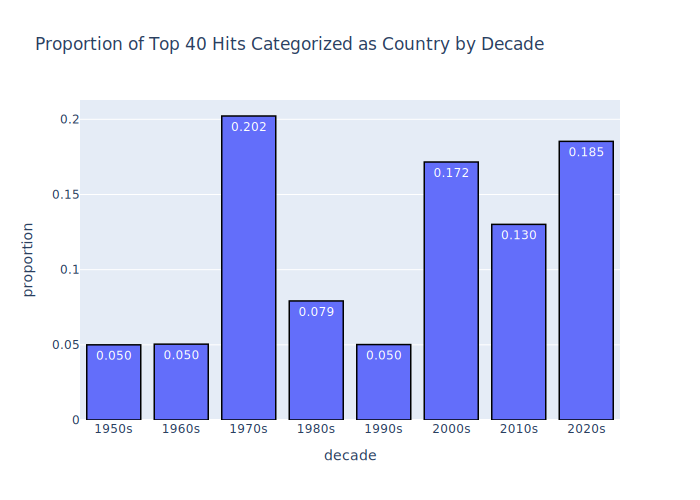

In [58]:
hits_prop("country")

#Country's mainstream popularity has been up and down. It peaked in the 1970s
#and dropped drasitcally in the 80s and 90s before resurging in the 00s 
#and the early 2020s

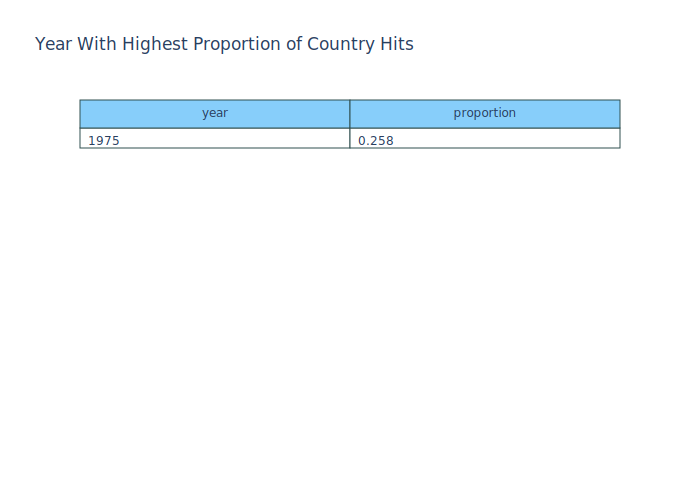

In [59]:
prop_most("country")

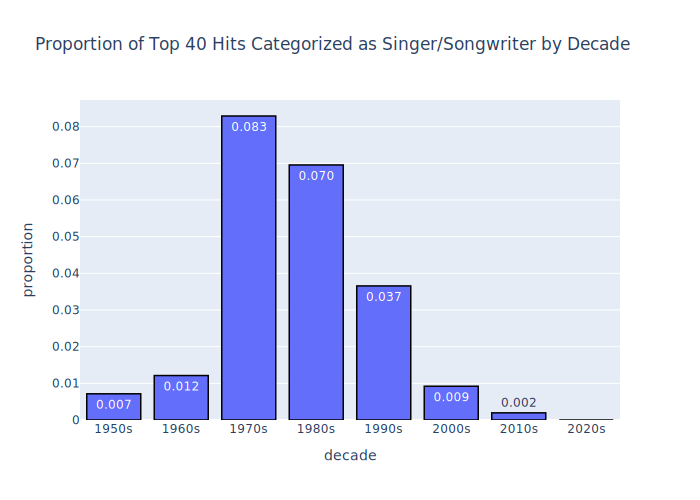

In [60]:
hits_prop("singer/songwriter")

#Singer/Songwriter hits peked in the 1970s and slowly declined before almost completely
#disappearing from the charts by the 2000s.

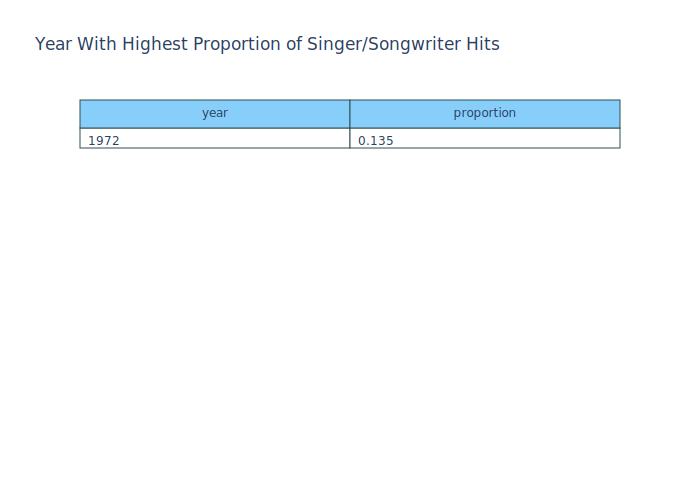

In [61]:
prop_most("singer/songwriter")

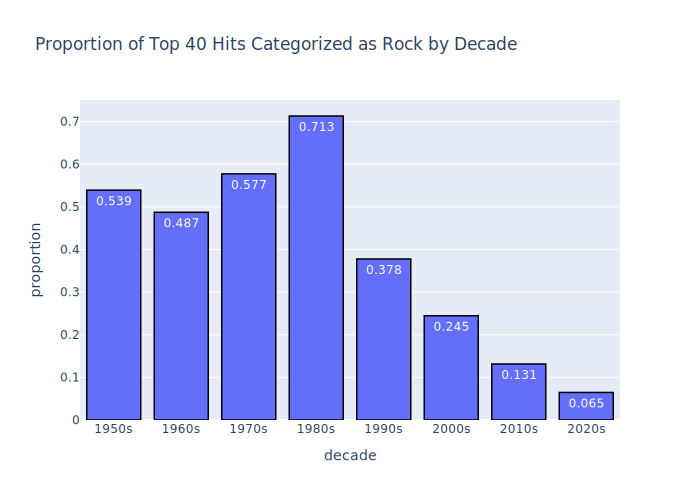

In [62]:
hits_prop("rock")

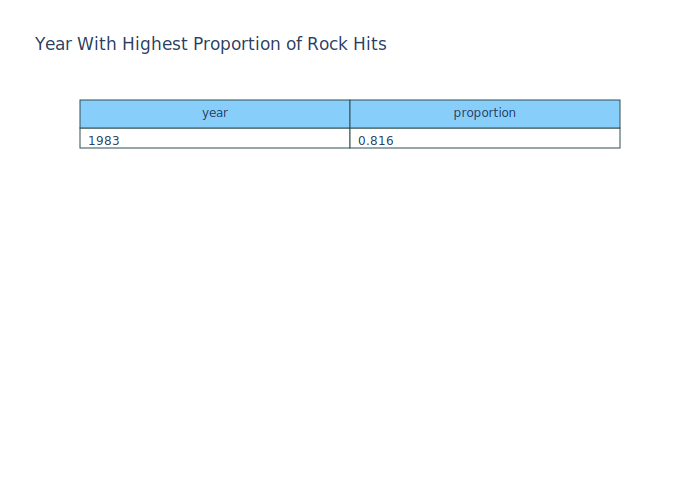

In [63]:
prop_most("rock")

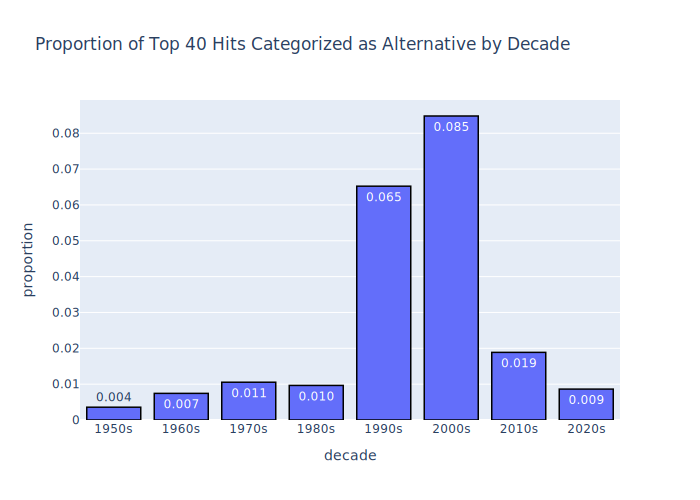

In [64]:
hits_prop("alternative")

#As 'traditional' rock began to decline post 1980s, alternative music began to increase in
#mainstream popularity before declining in the 2010s and 2020s

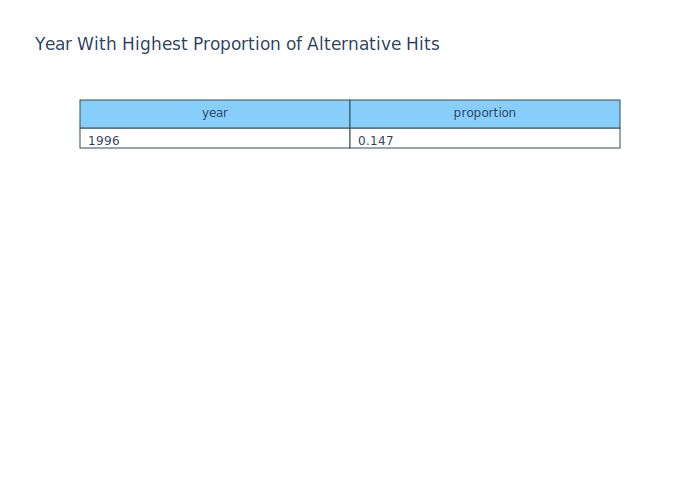

In [65]:
prop_most("alternative")

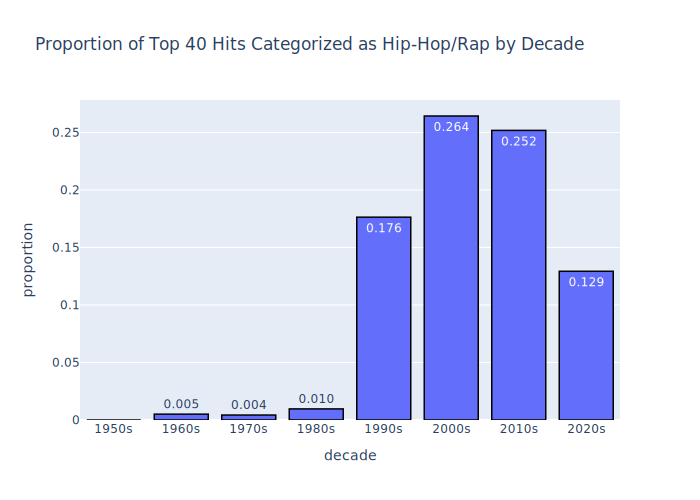

In [66]:
#graph to show proportion of 'hip-hop/rap hits each decade'
hits_prop("hip-hop/rap")

#Hip-Hop-Rap as a genre was born in the 1970s, and exploded on the mainstream in the 1990s. It peaked in 
#2000s and began declining in the early 2020s.

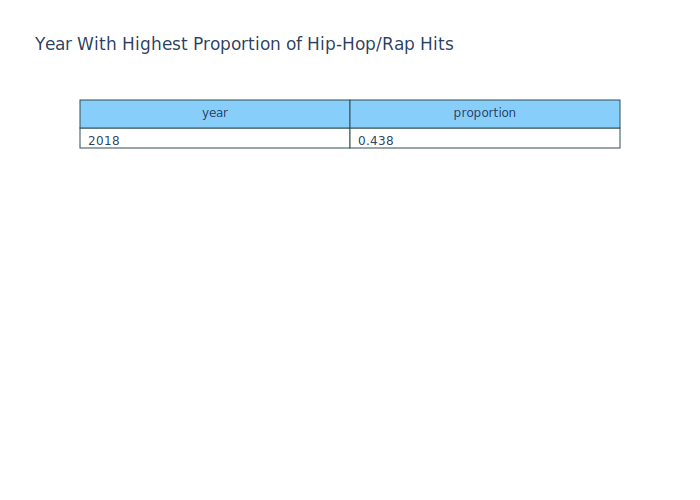

In [67]:
prop_most("hip-hop/rap")

In [68]:
prop_rank = ((top_40.groupby("decade")["pop"].sum())/(top_40.groupby("decade")['song'].count())).rank(ascending = False, method = "min").to_frame().reset_index()
prop_rank = prop_rank.rename(columns = {0 : "pop"})
genres = ["r&b", "rock", "alternative", "hip-hop/rap", "country", "singer/songwriter", "jazz"]
for genre in genres:
    df = ((top_40.groupby("decade")[genre].sum())/(top_40.groupby("decade")['song'].count())).rank(ascending = False, method = "min").to_frame().reset_index()
    df = df.rename(columns = {0 : genre})
    prop_rank = pd.merge(prop_rank, df, how = "inner", on = "decade")

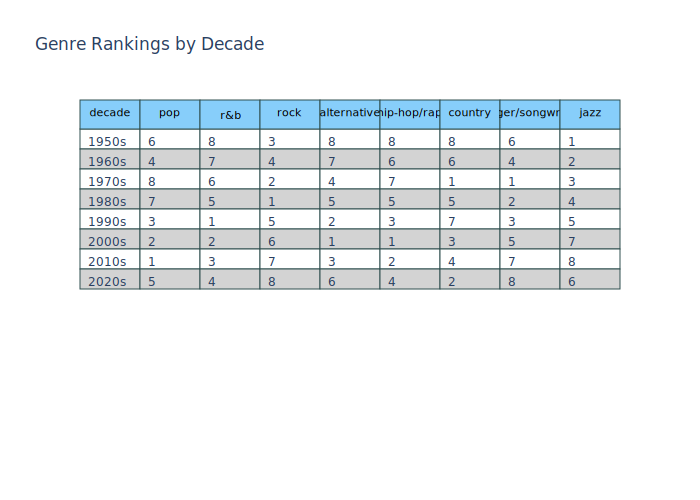

In [69]:
rowOddColor = 'white'
rowEvenColor = 'lightgrey'
fig = go.Figure(data=[go.Table(
        header=dict(values=list(prop_rank.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=11)),
        cells=dict(values=[prop_rank["decade"], prop_rank["pop"], prop_rank["r&b"], prop_rank["rock"], prop_rank["alternative"],
                   prop_rank["hip-hop/rap"], prop_rank["country"], prop_rank["singer/songwriter"],prop_rank["jazz"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*4],
                   align='left'))])
fig.update_layout(title_text = "Genre Rankings by Decade")
fig.show()